In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Business Sense

## Loading Data and initial remarks
- looking for variables with missing data
- looking for categoricals and continuous features
- looking for data types that can be converted (dates/categoricals/etc.)

In [78]:
# Loading the data into a DataFrame
data_df = pd.read_csv('../data/kc_house_data.csv')

In [79]:
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [80]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [81]:
data_df.drop('id',axis=1,inplace=True)

- date variable is in string format, changing the date to a datetime type

In [82]:
data_df['date'] = pd.to_datetime(data_df['date'])

In [83]:
data_df['date'].min(),data_df['date'].max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

- Looks like this data was taken between years 2014 and 2015. There will be good information for model testing however we might need more recent information for better model validation. There probably won't be much of a correlation between the sale date and the sale price and so we will drop the information for the model fit.

### View

In [84]:
data_df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

- there are nan's in view and it isn't clear what the values stored in the column represent. The documentation states "Has been viewed" however the values in the column range 0-4.
- putting zeros into the view na's would not change the population statistics much.

In [85]:
data_df["view"] = data_df["view"].fillna(0)


### waterfront

In [92]:
data_df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

- water front has nan values and it isn't clear how to fill those values in yet. we might try something with the lat and lon or the zip code and compare those properties with properties that definitely have a lake view.
- .fillna(0)

In [93]:
data_df['waterfront'] = data_df['waterfront'].fillna(0)

In [94]:
data_df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

### year rennovated

In [95]:
data_df['yr_renovated'].value_counts()

N/A       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1946.0        1
1944.0        1
1976.0        1
1934.0        1
Name: yr_renovated, Length: 70, dtype: int64

- year renovated looks like a categorical. but there are many vlues with 0.0. it is assumed that 0.0 takes the place of houses that

In [96]:
data_df['yr_renovated'].replace(0.0,'N/A',inplace=True)
data_df['yr_renovated'].fillna('N/A',inplace=True)

In [97]:
data_df['yr_renovated'].value_counts()

N/A       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1946.0        1
1944.0        1
1976.0        1
1934.0        1
Name: yr_renovated, Length: 70, dtype: int64

- there are too many data points that are missing a year in this column to justify using it. 

In [98]:
data_df.drop('yr_renovated',axis=1,inplace=True)

## Regarding the Cate

- bedrooms,bathrooms,floors,waterfront,view,

<AxesSubplot:>

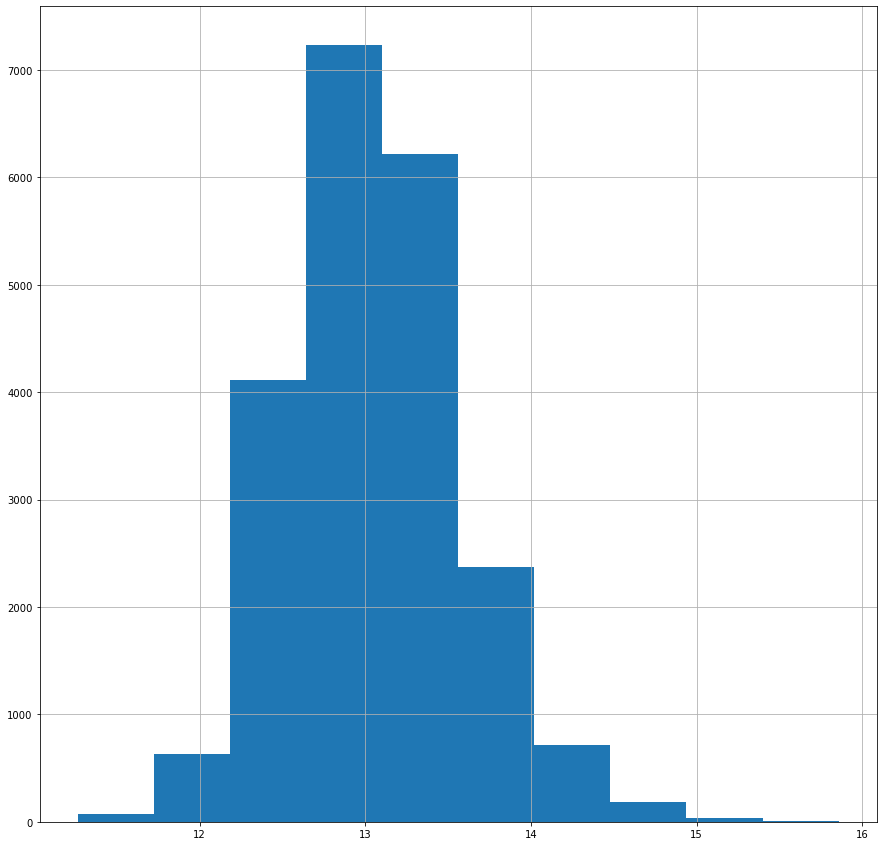

In [187]:
np.log(data_df['price']).hist(figsize=(15,15))


- bedrooms,bathrooms,floors,view,condition,year built,grade,zipcode
- price,sqft_living,sqft_above,lat,long,sqft_living15,sqft_lot15

In [73]:
data_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [128]:
data_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315961,0.510657,0.701929,0.089879,0.256820,0.264308,0.393502,0.036031,0.667964,0.605392,0.053965,-0.053409,0.306687,0.022047,0.585267,0.082849
bedrooms,0.315961,1.000000,0.479004,0.593178,0.033602,0.183707,-0.002054,0.080741,0.023440,0.366174,0.492543,0.160736,-0.158588,-0.011595,0.136561,0.404532,0.031892
bathrooms,0.510657,0.479004,1.000000,0.698588,0.086021,0.475441,0.059584,0.175102,-0.127233,0.607148,0.640880,0.434515,-0.160461,0.031119,0.180755,0.510928,0.082027
sqft_living,0.701929,0.593178,0.698588,1.000000,0.173449,0.353941,0.104635,0.281710,-0.059397,0.762776,0.876448,0.318140,-0.199793,0.052178,0.241200,0.756400,0.184337
sqft_lot,0.089879,0.033602,0.086021,0.173449,1.000000,-0.004824,0.021458,0.075052,-0.008806,0.114726,0.184134,0.052939,-0.129582,-0.085507,0.230222,0.144756,0.718203
floors,0.256820,0.183707,0.475441,0.353941,-0.004824,1.000000,0.020794,0.028401,-0.264013,0.458783,0.523970,0.489175,-0.059522,0.049280,0.125912,0.280072,-0.010734
waterfront,0.264308,-0.002054,0.059584,0.104635,0.021458,0.020794,1.000000,0.380543,0.016659,0.082817,0.071776,-0.024491,0.028925,-0.012154,-0.037632,0.083822,0.030657
view,0.393502,0.080741,0.175102,0.281710,0.075052,0.028401,0.380543,1.000000,0.045663,0.249077,0.166007,-0.054464,0.085066,0.006334,-0.077715,0.278921,0.073079
condition,0.036031,0.023440,-0.127233,-0.059397,-0.008806,-0.264013,0.016659,0.045663,1.000000,-0.146854,-0.158826,-0.361555,0.002835,-0.015209,-0.105800,-0.092979,-0.003093
grade,0.667964,0.366174,0.607148,0.762776,0.114726,0.458783,0.082817,0.249077,-0.146854,1.000000,0.756069,0.447854,-0.185761,0.113602,0.200324,0.713863,0.120974


In [129]:
data_df['quality_of_design'] = pd.cut(data_df.grade,bins=[0,3,10,13],labels=['low','medium','high'])

In [130]:
data_df['quality_of_design'].value_counts()

medium    21094
high        501
low           1
Name: quality_of_design, dtype: int64

In [101]:
data_df = data_df[data_df.bedrooms != 33]

In [102]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21596 non-null  datetime64[ns]
 1   price          21596 non-null  float64       
 2   bedrooms       21596 non-null  int64         
 3   bathrooms      21596 non-null  float64       
 4   sqft_living    21596 non-null  int64         
 5   sqft_lot       21596 non-null  int64         
 6   floors         21596 non-null  float64       
 7   waterfront     21596 non-null  float64       
 8   view           21596 non-null  float64       
 9   condition      21596 non-null  int64         
 10  grade          21596 non-null  int64         
 11  sqft_above     21596 non-null  int64         
 12  sqft_basement  21596 non-null  object        
 13  yr_built       21596 non-null  int64         
 14  zipcode        21596 non-null  int64         
 15  lat            2159

In [147]:
data_df['bathrooms'] = data_df['bathrooms'].astype('str')

In [148]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               21596 non-null  datetime64[ns]
 1   price              21596 non-null  float64       
 2   bedrooms           21596 non-null  int64         
 3   bathrooms          21596 non-null  object        
 4   sqft_living        21596 non-null  int64         
 5   sqft_lot           21596 non-null  int64         
 6   floors             21596 non-null  float64       
 7   waterfront         21596 non-null  float64       
 8   view               21596 non-null  float64       
 9   condition          21596 non-null  int64         
 10  grade              21596 non-null  int64         
 11  sqft_above         21596 non-null  int64         
 12  sqft_basement      21596 non-null  object        
 13  yr_built           21596 non-null  int64         
 14  zipcod

In [171]:
categoricals = ['floors','view','condition','grade','bedrooms']#,'yr_built''zipcode',
continuous = ['price','sqft_living','sqft_above','sqft_living15','sqft_lot15']
data_preprocessed = pd.concat([data_df[continuous],data_df[categoricals]],axis=1)
scaled_log_continuous = []
for col in continuous:
    log_label = 'log_'+col

    log_var = np.log(data_preprocessed[col])
    log_var_normal = (log_var - np.mean(log_var))/np.std(log_var)

    data_preprocessed[log_label] = log_var_normal
    data_preprocessed.drop(col,axis=1,inplace=True)
    scaled_log_continuous.append(log_label)


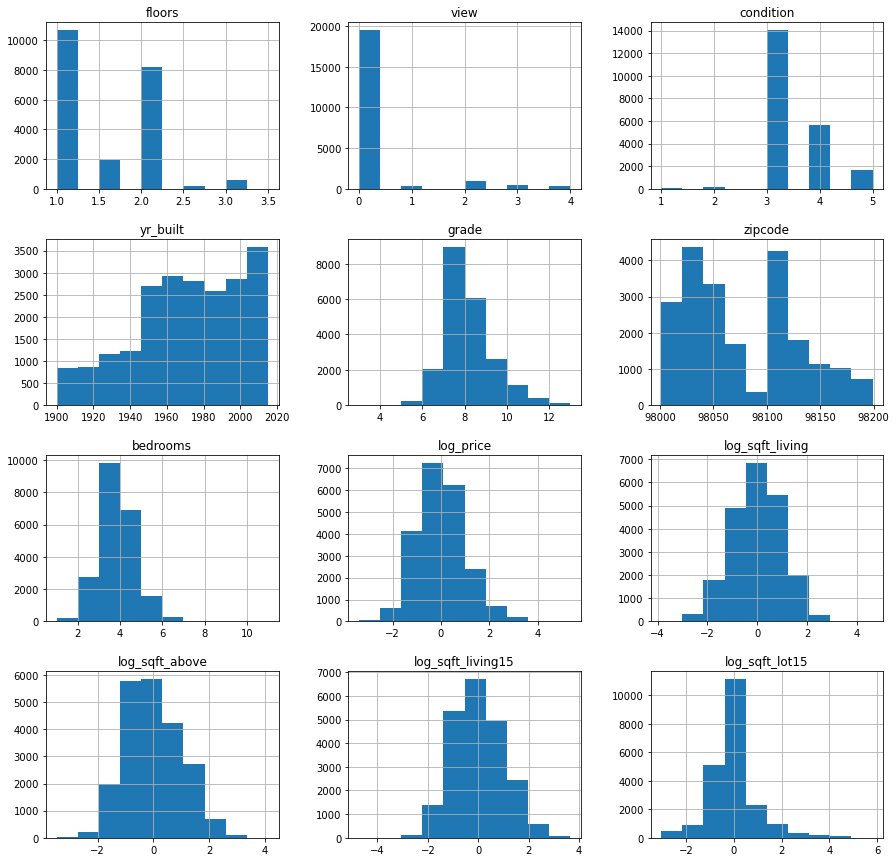

In [173]:
data_preprocessed.hist(figsize=(15,15));

In [ ]:
from sklearn.preprocessing import OneHotEncoder
for col in categoricals:
    data_preprocessed[col] = data_preprocessed[col].astype('str')
    var_train = data_preprocessed[[col]]

    # (2) Instantiate a OneHotEncoder with categories="auto",
    # sparse=False, and handle_unknown="ignore"
    ohe = OneHotEncoder(categories='auto',sparse=False,drop='first')
    # (3) Fit the encoder on fireplace_qu_train
    ohe.fit(var_train)
    var_encoded_train = ohe.transform(var_train)
    # Visually inspect fireplace_qu_encoded_train
    var_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    var_encoded_train,
    # Set the column names to the categories found by OHE
    columns=col+'_'+ohe.categories_[0][:len(data_preprocessed[col].value_counts())-1],
    # Set the index to match X_train's index
    index=data_preprocessed.index
    )
    data_preprocessed = pd.concat([data_preprocessed, var_encoded_train], axis=1)
    data_preprocessed.drop(col,axis=1,inplace=True)

In [178]:
pd.set_option('display.max_columns', None)

data_preprocessed.head()

,log_price,log_sqft_living,log_sqft_above,log_sqft_living15,log_sqft_lot15,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,view_0.0,view_1.0,view_2.0,view_3.0,condition_1,condition_2,condition_3,condition_4,yr_built_1900,yr_built_1901,yr_built_1902,yr_built_1903,yr_built_1904,yr_built_1905,yr_built_1906,yr_built_1907,yr_built_1908,yr_built_1909,yr_built_1910,yr_built_1911,yr_built_1912,yr_built_1913,yr_built_1914,yr_built_1915,yr_built_1916,yr_built_1917,yr_built_1918,yr_built_1919,yr_built_1920,yr_built_1921,yr_built_1922,yr_built_1923,yr_built_1924,yr_built_1925,yr_built_1926,yr_built_1927,yr_built_1928,yr_built_1929,yr_built_1930,yr_built_1931,yr_built_1932,yr_built_1933,yr_built_1934,yr_built_1935,yr_built_1936,yr_built_1937,yr_built_1938,yr_built_1939,yr_built_1940,yr_built_1941,yr_built_1942,yr_built_1943,yr_built_1944,yr_built_1945,yr_built_1946,yr_built_1947,yr_built_1948,yr_built_1949,yr_built_1950,yr_built_1951,yr_built_1952,yr_built_1953,yr_built_1954,yr_built_1955,yr_built_1956,yr_built_1957,yr_built_1958,yr_built_1959,yr_built_1960,yr_built_1961,yr_built_1962,yr_built_1963,yr_built_1964,yr_built_1965,yr_built_1966,yr_built_1967,yr_built_1968,yr_built_1969,yr_built_1970,yr_built_1971,yr_built_1972,yr_built_1973,yr_built_1974,yr_built_1975,yr_built_1976,yr_built_1977,yr_built_1978,yr_built_1979,yr_built_1980,yr_built_1981,yr_built_1982,yr_built_1983,yr_built_1984,yr_built_1985,yr_built_1986,yr_built_1987,yr_built_1988,yr_built_1989,yr_built_1990,yr_built_1991,yr_built_1992,yr_built_1993,yr_built_1994,yr_built_1995,yr_built_1996,yr_built_1997,yr_built_1998,yr_built_1999,yr_built_2000,yr_built_2001,yr_built_2002,yr_built_2003,yr_built_2004,yr_built_2005,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014,grade_10,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,bedrooms_1,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8
0,-1.401982,-1.125577,-0.753633,-1.035505,-0.395482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.279969,0.709431,0.672662,-0.326839,-0.024316,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0